In [14]:
import glob
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from weak_feature_extractor import feat_extractor as fe

In [2]:
audio_folder = '/Users/avidwans/Documents/CBIR/CBIR_data/audio_train/'

split_files = '/Users/avidwans/Documents/CBIR/cbir-develop/dcase2018_gen/'
train_lbl_files = split_files + 'train.labels'
train_meta = split_files + 'train.meta'
test_lbl_files = split_files + 'test.labels'
test_meta = split_files + 'test.meta'

# read train and test labels from file
tr_lbl_onehot = np.loadtxt(train_lbl_files, delimiter=',', skiprows=1)
ts_lbl_onehot = np.loadtxt(test_lbl_files, delimiter=',', skiprows=1)

In [3]:
#convert one hot labels to integer
tr_lbl = [ np.where(r==1)[0][0] for r in tr_lbl_onehot ]
ts_lbl = [ np.where(r==1)[0][0] for r in ts_lbl_onehot ]
tr_files = pd.read_csv(train_meta)
tr_features = np.empty([len(tr_lbl), 1024])
ts_files = pd.read_csv(test_meta)
ts_features = np.empty([len(ts_lbl), 1024])

In [4]:
tr_features = np.loadtxt("train_features.csv", delimiter=',')
ts_features = np.loadtxt("test_features.csv", delimiter=',')

In [5]:
linsvm_model = svm.SVC(kernel = 'linear').fit(tr_features,tr_lbl)
ts_pred = linsvm_model.predict(ts_features)

accuracy = linsvm_model.score(ts_features, ts_lbl)
print(accuracy)

cm = confusion_matrix(ts_lbl, ts_pred)
print(cm)

0.7331896551724137
[[59  0  0 ...  0  1  0]
 [ 0 87  1 ...  1  0  0]
 [ 0  0 47 ...  0  0  2]
 ...
 [ 0  1  0 ... 62  0  1]
 [ 3  0  0 ...  0  6  1]
 [ 1  0  0 ...  0  0 51]]


In [ ]:
ts_lbl_str = 

In [6]:
sum(cm)

array([ 82,  96,  63, 111,  59,  26,  65,  24,  61,  34,  68,  37,  85,
        45,  29,  94,  15,  90,  59,  11,  78,  25,  29,  78,  32,  65,
        94,  34,  30,  80,  25,  23,  88,  88,  85,  50,  92,  20,  73,
        14,  63])

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

In [10]:
unique, counts = np.unique(tr_lbl, return_counts=True)
tr_hist = np.asarray((unique, counts)).T

In [11]:
unique, counts = np.unique(ts_lbl, return_counts=True)
ts_hist = np.asarray((unique, counts)).T

<Container object of 41 artists>

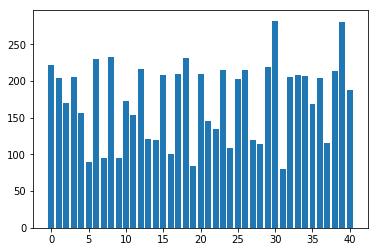

In [12]:
plt.bar(tr_hist[:,0],tr_hist[:,1])

<Container object of 41 artists>

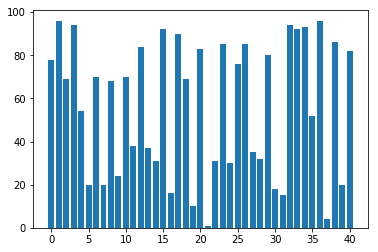

In [13]:
plt.bar(ts_hist[:,0],ts_hist[:,1])

In [17]:
#crossvalidation for selection of best C parameter..

In [16]:
Cs = np.logspace(-6, -1, 10)
svc = svm.SVC(kernel = 'linear')
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(tr_features,tr_lbl) 
print(clf.best_score_)
print(clf.best_estimator_.C)
print(clf.score(ts_features,ts_lbl))

0.748077729623934
0.1
0.7301724137931035
